## Sogamoso dropout EDA

In this notebook will be conducted the EDA in order to understand what data we have and how those data is related with the dropout in Sogamoso.

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install functions
!pip install pingouin


  Using cached pingouin-0.5.1-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached scikit_learn-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31.2 MB)
  Using cached pandas_flavor-0.3.0-py3-none-any.whl (6.3 kB)
  Using cached lazy_loader-0.1rc2-py3-none-any.whl (5.1 kB)
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


  Using cached functions-0.7.0-py3-none-any.whl


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin

## Import own/specific functions 
from functions import *

SyntaxError: invalid syntax (functions.py, line 68)

In [ ]:
# Dataset Load

AO_2019 = pd.read_csv("alumnos_s_oficial2019.csv", delimiter=';', encoding='cp1252')
#AO_2019.head(5)
AO_2019_Col =  list(AO_2019)

AO_2020 = pd.read_csv("alumnos_s_oficial2020.csv", delimiter=';', encoding='cp1252', low_memory=False)
AO_2020_Col =  list(AO_2020)

AO_2021 = pd.read_csv("alumnos_s_oficial2021.csv", delimiter=';', encoding='cp1252')
AO_2021_Col =  list(AO_2021)

AO_2022 = pd.read_csv("alumnos_s_oficial2022.csv", delimiter=';', encoding='cp1252')
AO_2022_Col =  list(AO_2022)


### Remove unnecesary columns

In [ ]:
del_columns = ['SEDE', 'CODIGO_DANE_SEDE', 'SISBEN IV', 'SISBEN_TRES', 'PER_ID', 'TIPO DE SANGRE', 'MATRICULACONTRATADA', 'FUENTE_RECURSOS', 'INTERNADO', 'NUM_CONTRATO', 'APOYO_ACADEMICO_ESPECIAL', 'CONSECUTIVO', 'SRPA', 'Unnamed: 25', 'Unnamed: 33']
for del_col in del_columns:
    if del_col in AO_2019_Col:
        del AO_2019[del_col]
    if del_col in AO_2020_Col:
        del AO_2020[del_col]
    if del_col in AO_2021_Col:
        del AO_2021[del_col]
    if del_col in AO_2022_Col:
        del AO_2022[del_col]

In [ ]:
print(len(AO_2019.columns))
print(len(AO_2019))
print(len(AO_2020.columns))
print(len(AO_2020))
print(len(AO_2021.columns))
print(len(AO_2021))
print(len(AO_2022.columns))
print(len(AO_2022))
print("------")
print(AO_2019.info())
print(AO_2020.info())
print(AO_2021.info())
print(AO_2022.info())

21
21710
21
19994
21
21562
21
21111
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21710 entries, 0 to 21709
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ANO           21710 non-null  int64  
 1   ETC           21710 non-null  object 
 2   ESTADO        21710 non-null  object 
 3   JERARQUIA     21710 non-null  object 
 4   INSTITUCION   21695 non-null  object 
 5   DANE          21695 non-null  object 
 6   CALENDARIO    21695 non-null  object 
 7   SECTOR        21710 non-null  object 
 8   ZONA_SEDE     21695 non-null  object 
 9   JORNADA       21695 non-null  object 
 10  GRADO_COD     21701 non-null  float64
 11  GRUPO         21667 non-null  object 
 12  MODELO        21695 non-null  object 
 13  MOTIVO        958 non-null    object 
 14  FECHAINI      21710 non-null  object 
 15  FECHAFIN      0 non-null      float64
 16  NUI           21710 non-null  object 
 17  ESTRATO       21708 non-nu

In [ ]:
AO_HIST = pd.concat([AO_2019, AO_2020, AO_2021, AO_2022])

In [ ]:
#AO_HIST.to_csv("alumnos_historico.csv")

In [ ]:
#AO_HIST.head(5)
#print(AO_HIST.info())
AO_HIST["ID"] = AO_HIST["NUI"] + AO_HIST["ANO"].apply(str)
#AO_HIST.head(5)
df_analysis(AO_HIST, key_columns=["ID"], analysis_type="complete")



NameError: name 'df_analysis' is not defined

In [ ]:
AO_HIST.head(10)
#AO_HIST["MOTIVO"].unique()
#AO_HIST["SECTOR"].unique()

In [ ]:
AO_HIST["DISCAPACIDAD"].unique()

array(['NO APLICA', 'INTELECTUAL', 'TRANSTORNO DEL ESPECTRO AUTISTA',
       'MENTAL- PSICOSOCIAL', 'OTRA DISCAPACIDAD', 'SISTEMICA',
       'FISICA - MOVILIDAD', 'MULTIPLE',
       'TRANSTORNO PERMANENTE DE VOZ Y HABLA',
       'DISCAPACIDAD AUDITIVA - USUARIO DEL CASTELLANO',
       'DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¾AS COLOMBIANA',
       'VISUAL - BAJA VISION IRREVERSIBLE', 'VISUAL - CEGUERA', nan,
       'HIPOACUSIA O BAJA...', 'S™NDROME DE DOWN',
       'DISCAPACIDAD VISUAL CEGUERA', 'DISCAPACIDAD INTELECTUAL',
       'DISCAPACIDAD PSICOSOCIAL (MENTAL)', 'DISCAPACIDAD MéLTIPLE',
       'DISCAPACIDAD FÖSICA',
       'DISCAPACIDAD VISUAL BAJA VISIàN IRREVERSIBLE',
       'DISCAPACIDAD AUDITIVA USUARIO DEL CASTELLANO',
       'DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¥AS COLOMBIANA',
       'TRASTORNO DEL ESPECTRO AUTISTA', 'SORDOCEGUERA',
       'SÖNDROME DE DOWN', 'LESIàN NEUROMUSCULAR'], dtype=object)

In [ ]:
# INSTITUCION, GENERO, JORNADA, GRADO_COD, GRUPO, MODELO, ESTRATO, DISCAPACIDAD, PAIS_ORIGEN
# MOTIVO, SRPA

ESTADO
ASIGNADO               9
CANCELADO              4
GRADUADO             209
INSCRITO              33
MATRICULADO        79585
NUEVO                 11
PROMOCIONADO          10
REPROBADO            268
RETIRADO            3247
SIN CONTINUIDAD     1001
Name: ESTADO, dtype: int64


<AxesSubplot:xlabel='ESTADO'>

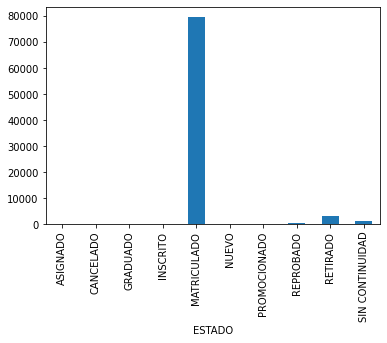

In [ ]:
DF_AO_HIST_ESTADO = AO_HIST.groupby(["ESTADO"])["ESTADO"].count()
print(DF_AO_HIST_ESTADO)
DF_AO_HIST_ESTADO.plot.bar()

INSTITUCION
INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI                                 8093
INSTITUCION EDUCATIVA EL CRUCERO                                          1403
INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES              2602
INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES INSEANDES     2306
INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER                        2673
INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO                 567
INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO                 15125
INSTITUCION EDUCATIVA LA INDEPENDENCIA                                    1063
INSTITUCION EDUCATIVA LOS LIBERTADORES                                    6271
INSTITUCION EDUCATIVA MAGDALENA                                           6324
INSTITUCION EDUCATIVA MARCO ANTONIO QUIJANO RICO                           562
INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA                14408
INSTITUCION EDUCATIVA RAFAEL GUTIERREZ G

<AxesSubplot:xlabel='INSTITUCION'>

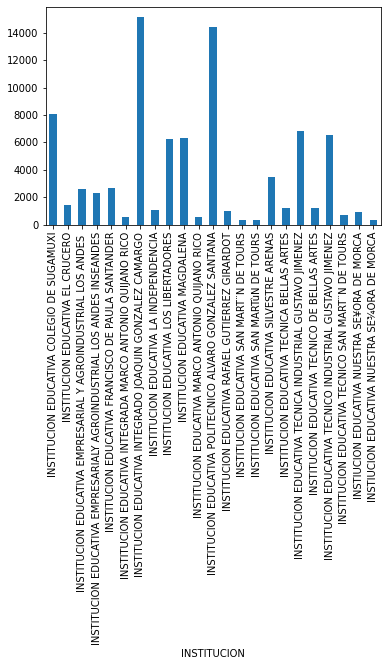

In [ ]:
DF_AO_HIST_INSTITUCION = AO_HIST.groupby(["INSTITUCION"])["INSTITUCION"].count()
print(DF_AO_HIST_INSTITUCION)
DF_AO_HIST_INSTITUCION.plot.bar()

In [ ]:
def clean_institucion(value):
    if value == "INSTIUCION EDUCATIVA NUESTRA SE¥ORA DE MORCA":
        label = "INSTITUCION EDUCATIVA NUESTRA SENORA DE MORCA"
    elif value == "INSTIUCION EDUCATIVA NUESTRA SE¾ORA DE MORCA":
        label = "INSTITUCION EDUCATIVA NUESTRA SENORA DE MORCA"
    elif value == "INSTITUCION EDUCATIVA SAN MART¨N DE TOURS":
        label = "INSTITUCION EDUCATIVA SAN MARTIN DE TOURS"
    elif value == "INSTITUCION EDUCATIVA SAN MARTùN DE TOURS":
        label = "INSTITUCION EDUCATIVA SAN MARTIN DE TOURS"
    elif value == "INSTITUCION EDUCATIVA TECNICO SAN MART¨N DE TOURS":
        label = "INSTITUCION EDUCATIVA SAN MARTIN DE TOURS"
    elif value == "INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES ":
        label = "INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES"
    elif value == "INSTITUCION EDUCATIVA TECNICA BELLAS ARTES":
        label = "INSTITUCION EDUCATIVA TECNICO DE BELLAS ARTES"
    elif value == "INSTITUCION EDUCATIVA TECNICO INDUSTRIAL GUSTAVO JIMENEZ":
        label = "INSTITUCION EDUCATIVA TECNICA INDUSTRIAL GUSTAVO JIMENEZ"   
    elif value == "INSTITUCION EDUCATIVA EMPRESARIALY AGROINDUSTRIAL LOS ANDES INSEANDES":
        label = "INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES"        
        

    else:
        label = value
    return label


AO_HIST["INSTITUCION_CORREGIDA"] = AO_HIST["INSTITUCION"].apply(clean_institucion)

INSTITUCION_CORREGIDA
INSTITUCION EDUCATIVA COLEGIO DE SUGAMUXI                        8093
INSTITUCION EDUCATIVA EL CRUCERO                                 1403
INSTITUCION EDUCATIVA EMPRESARIAL Y AGROINDUSTRIAL LOS ANDES     4908
INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER               2673
INSTITUCION EDUCATIVA INTEGRADA MARCO ANTONIO QUIJANO RICO        567
INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO        15125
INSTITUCION EDUCATIVA LA INDEPENDENCIA                           1063
INSTITUCION EDUCATIVA LOS LIBERTADORES                           6271
INSTITUCION EDUCATIVA MAGDALENA                                  6324
INSTITUCION EDUCATIVA MARCO ANTONIO QUIJANO RICO                  562
INSTITUCION EDUCATIVA NUESTRA SENORA DE MORCA                    1273
INSTITUCION EDUCATIVA POLITECNICO ALVARO GONZALEZ SANTANA       14408
INSTITUCION EDUCATIVA RAFAEL GUTIERREZ GIRARDOT                   998
INSTITUCION EDUCATIVA SAN MARTIN DE TOURS                        138

<AxesSubplot:xlabel='INSTITUCION_CORREGIDA'>

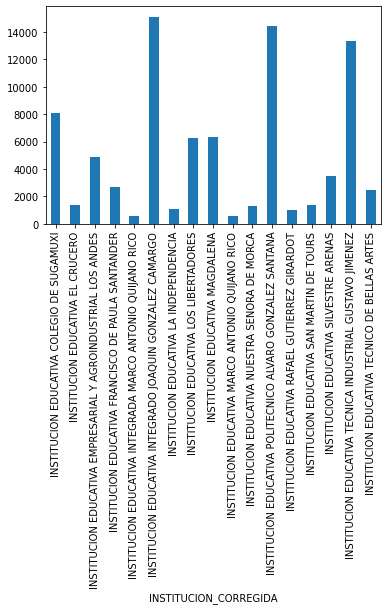

In [ ]:
DF_AO_HIST_INSTITUCION_CORREGIDA = AO_HIST.groupby(["INSTITUCION_CORREGIDA"])["INSTITUCION_CORREGIDA"].count()
print(DF_AO_HIST_INSTITUCION_CORREGIDA)
DF_AO_HIST_INSTITUCION_CORREGIDA.plot.bar()


GENERO
FEMENINO     41072
MASCULINO    43305
Name: GENERO, dtype: int64


<AxesSubplot:xlabel='GENERO'>

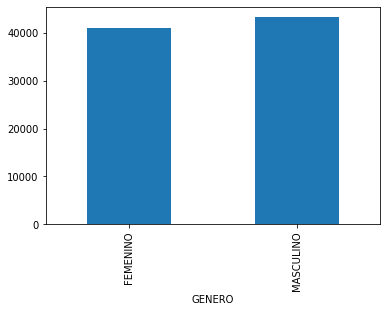

In [ ]:
DF_AO_HIST_GENERO = AO_HIST.groupby(["GENERO"])["GENERO"].count()
print(DF_AO_HIST_GENERO)
DF_AO_HIST_GENERO.plot.bar()

JORNADA
FIN DE SEMANA     2972
MA¥ANA           31701
MA¾ANA           10401
NOCTURNA          3494
TARDE            26596
éNICA             6844
‚NICA             2321
Name: JORNADA, dtype: int64


<AxesSubplot:xlabel='JORNADA'>

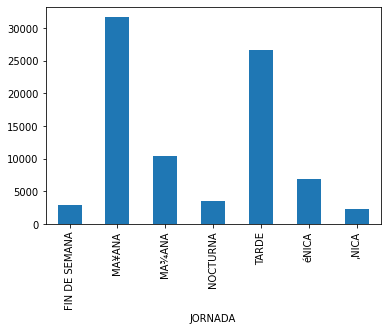

In [ ]:
DF_AO_HIST_JORNADA = AO_HIST.groupby(["JORNADA"])["JORNADA"].count()
print(DF_AO_HIST_JORNADA)
DF_AO_HIST_JORNADA.plot.bar()

In [ ]:
AO_HIST["JORNADA"].unique()

array(['MA¾ANA', '‚NICA', 'FIN DE SEMANA', 'NOCTURNA', 'TARDE', nan,
       'éNICA', 'MA¥ANA'], dtype=object)

In [ ]:
def clean_jornada(value):
    if value == "MA¥ANA":
        label = "MANANA"
    elif value == "MA¾ANA":
        label = "MANANA"
    elif value == "‚NICA":
        label = "UNICA"
    elif value == "éNICA":
        label = "UNICA"
    else:
        label = value
    return label


AO_HIST["JORNADA_CORREGIDA"] = AO_HIST["JORNADA"].apply(clean_jornada)

JORNADA_CORREGIDA
FIN DE SEMANA     2972
MANANA           42102
NOCTURNA          3494
TARDE            26596
UNICA             9165
Name: JORNADA_CORREGIDA, dtype: int64


<AxesSubplot:xlabel='JORNADA_CORREGIDA'>

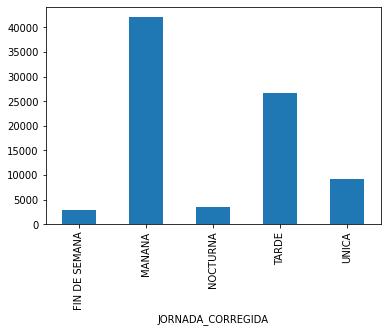

In [ ]:
DF_AO_HIST_JORNADA_CORREGIDA = AO_HIST.groupby(["JORNADA_CORREGIDA"])["JORNADA_CORREGIDA"].count()
print(DF_AO_HIST_JORNADA_CORREGIDA)
DF_AO_HIST_JORNADA_CORREGIDA.plot.bar()

ESTRATO
ESTRATO 0     1083
ESTRATO 1    33786
ESTRATO 2    44708
ESTRATO 3     3485
ESTRATO 4       73
ESTRATO 5       10
ESTRATO 6        6
NO APLICA     1212
Name: ESTRATO, dtype: int64


<AxesSubplot:xlabel='ESTRATO'>

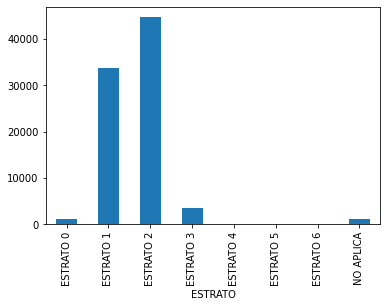

In [ ]:
DF_AO_HIST_ESTRATO = AO_HIST.groupby(["ESTRATO"])["ESTRATO"].count()
print(DF_AO_HIST_ESTRATO)
DF_AO_HIST_ESTRATO.plot.bar()

DISCAPACIDAD
DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¥AS COLOMBIANA       21
DISCAPACIDAD AUDITIVA - USUARIO DE LENGUA DE SE¾AS COLOMBIANA       20
DISCAPACIDAD AUDITIVA - USUARIO DEL CASTELLANO                       4
DISCAPACIDAD AUDITIVA USUARIO DEL CASTELLANO                        45
DISCAPACIDAD FÖSICA                                                 57
DISCAPACIDAD INTELECTUAL                                           587
DISCAPACIDAD MéLTIPLE                                               97
DISCAPACIDAD PSICOSOCIAL (MENTAL)                                  130
DISCAPACIDAD VISUAL BAJA VISIàN IRREVERSIBLE                        28
DISCAPACIDAD VISUAL CEGUERA                                         38
FISICA - MOVILIDAD                                                  18
HIPOACUSIA O BAJA...                                                 1
INTELECTUAL                                                        170
LESIàN NEUROMUSCULAR                                            

<AxesSubplot:xlabel='DISCAPACIDAD'>

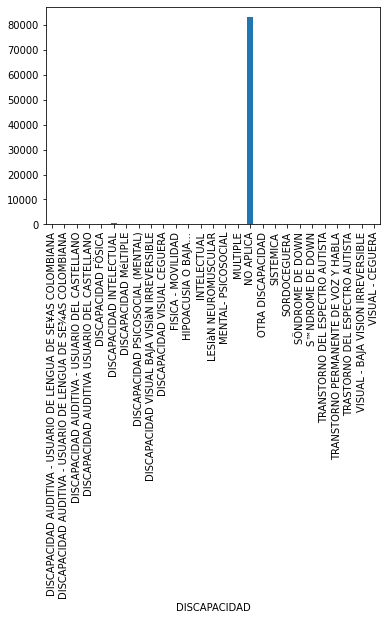

In [ ]:
DF_AO_HIST_DISCAPACIDAD = AO_HIST.groupby(["DISCAPACIDAD"])["DISCAPACIDAD"].count()
print(DF_AO_HIST_DISCAPACIDAD)
DF_AO_HIST_DISCAPACIDAD.plot.bar()

PAIS_ORIGEN
AFGANISTAN             2
ANDORRA                2
CHILE                  2
COLOMBIA           51341
DINAMARCA              1
ECUADOR                7
HAITI                  2
ITALIA                 2
MARTINICA              3
MEXICO                 1
NO APLICA             37
NO ESPECIFICADO        2
OMAN                   2
PAISES BAJOS           1
VANUATU                2
VENEZUELA           2898
YEMEN                  3
Name: PAIS_ORIGEN, dtype: int64


<AxesSubplot:xlabel='PAIS_ORIGEN'>

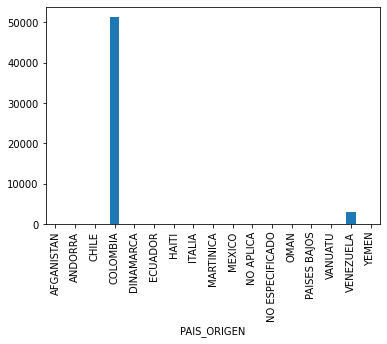

In [ ]:
DF_AO_HIST_PAIS_ORIGEN = AO_HIST.groupby(["PAIS_ORIGEN"])["PAIS_ORIGEN"].count()
print(DF_AO_HIST_PAIS_ORIGEN)
DF_AO_HIST_PAIS_ORIGEN.plot.bar()

In [ ]:
#Grapg_list = ['INSTITUCION', 'GENERO', 'JORNADA', 'GRADO_COD', 'GRUPO', 'MODELO', 'ESTRATO', 'DISCAPACIDAD', 'PAIS_ORIGEN']

#for var in Grapg_list:
    #DF_AO_HIST_VAR = AO_HIST.groupby([var])[var].count()
    #print(DF_AO_HIST_VAR)
    #DF_AO_HIST_VAR.plot.bar()

Text(0.5, 1.0, 'Status vs. Gender')

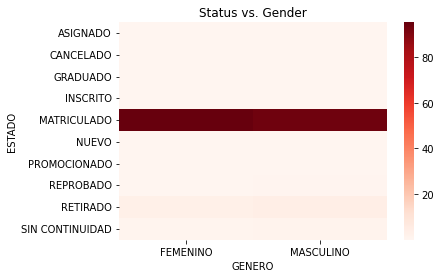

In [ ]:
TablaGen=pd.crosstab(index=AO_HIST["ESTADO"], columns=AO_HIST["GENERO"], normalize="columns")*100
TablaGen
GrafGen=sns.heatmap(TablaGen, cmap="Reds")
GrafGen.set_title("Status vs. Gender")

Text(0.5, 1.0, 'Status vs. Socioeconomic Status')

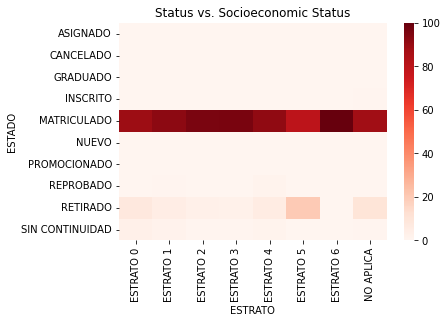

In [ ]:
TablaEst=pd.crosstab(index=AO_HIST["ESTADO"], columns=AO_HIST["ESTRATO"], normalize="columns")*100
TablaEst
GrafEst=sns.heatmap(TablaEst, cmap="Reds")
GrafEst.set_title("Status vs. Socioeconomic Status")

Text(0.5, 1.0, 'Status vs. Disability')

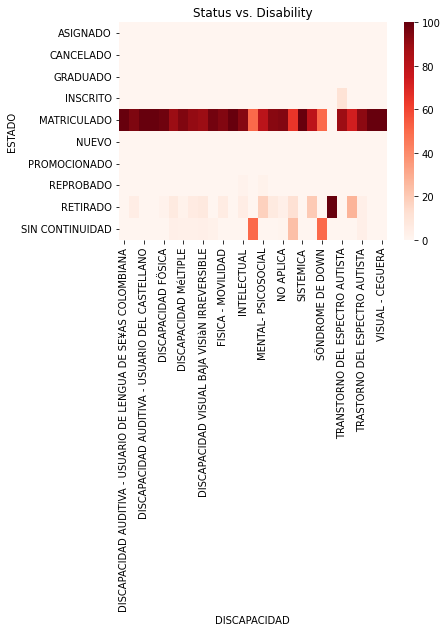

In [ ]:
TablaDis=pd.crosstab(index=AO_HIST["ESTADO"], columns=AO_HIST["DISCAPACIDAD"], normalize="columns")*100
TablaDis
GrafDis=sns.heatmap(TablaDis, cmap="Reds")
GrafDis.set_title("Status vs. Disability")

In [ ]:
TablaJor=pd.crosstab(index=AO_HIST["ESTADO"], columns=AO_HIST["JORNADA_CORREGIDA"], normalize="columns")*100
TablaJor
GrafJor=sns.heatmap(TablaJor, cmap="Reds")
GrafJor.set_title("Status vs. School day")

JORNADA_CORREGIDA,FIN DE SEMANA,MANANA,NOCTURNA,TARDE,UNICA
ESTADO,,,,,
ASIGNADO,0.000000,0.000000,0.028620,0.000000,0.087289
GRADUADO,0.605653,0.125885,2.633085,0.169198,0.010911
MATRICULADO,69.111709,96.871883,65.598168,96.721311,95.253682
PROMOCIONADO,0.134590,0.000000,0.000000,0.015040,0.021822
REPROBADO,0.740242,0.301648,0.286205,0.281997,0.370977
RETIRADO,13.492598,2.700584,16.342301,2.812453,4.255319
SIN CONTINUIDAD,15.915209,0.000000,15.111620,0.000000,0.000000


Text(0.5, 1.0, 'Status vs. Institution')

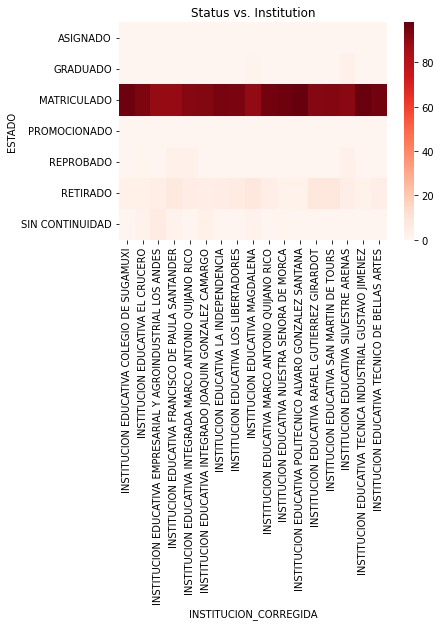

In [ ]:
TablaIns=pd.crosstab(index=AO_HIST["ESTADO"], columns=AO_HIST["INSTITUCION_CORREGIDA"], normalize="columns")*100
TablaIns
GrafIns=sns.heatmap(TablaIns, cmap="Reds")
GrafIns.set_title("Status vs. Institution")

Text(0.5, 1.0, 'Status vs. Country of origin')

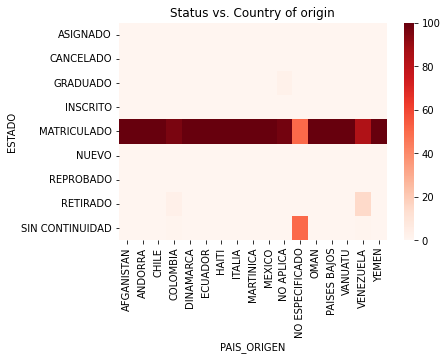

In [ ]:
TablaPais=pd.crosstab(index=AO_HIST["ESTADO"], columns=AO_HIST["PAIS_ORIGEN"], normalize="columns")*100
TablaPais
GrafPais=sns.heatmap(TablaPais, cmap="Reds")
GrafPais.set_title("Status vs. Country of origin")